Sign-up flow

We will now model the DGP of an eCommerce ad flow starting with sign-ups.

On any day, we get many ad impressions, which can be modeled as Poisson random variables (RV). You are told that lambda is normally distributed with a mean of 100k visitors and standard deviation 2000.

During the signup journey, the customer sees an ad, decides whether or not to click, and then whether or not to signup. Thus both clicks and signups are binary, modeled using binomial RVs. What about probability p of success? Our current low-cost option gives us a click-through rate of 1% and a sign-up rate of 20%. A higher cost option could increase the clickthrough and signup rate by up to 20%, but we are unsure of the level of improvement, so we model it as a uniform RV.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
low_ctr = 0.01
high_ctr = np.random.uniform(low=low_ctr, high=1.2*low_ctr) # a random value between low: 1% and high: [low, low + 20%*low]

high_ctr

0.011887564706835942

In [3]:
low_sur = 0.2
high_sur = np.random.uniform(low=low_sur, high=1.2*low_sur) # a random value between low: 20% and high: [low, low + 20%*low]

high_sur

0.2057391315285799

In [4]:
# Initialize click-through rate and signup rate dictionaries, such that the high values are uniformly distributed between the low value and the low value.

ct_rate = {'low':low_ctr, 'high':high_ctr}
su_rate = {'low':low_sur, 'high':high_sur}

ct_rate, su_rate

({'low': 0.01, 'high': 0.011887564706835942},
 {'low': 0.2, 'high': 0.2057391315285799})

C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

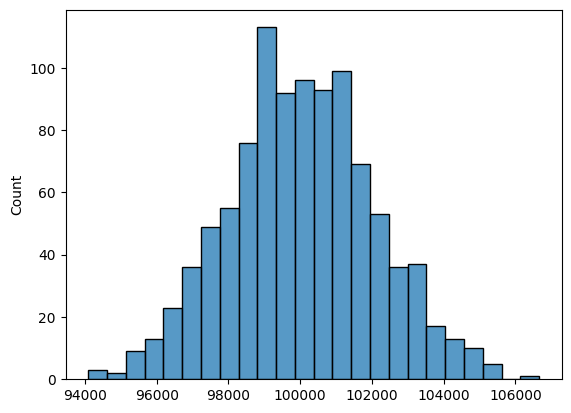

In [5]:
# Simulate impressions(poisson), clicks(binomial) and signups(binomial)
sims = 1000

# lambda (of the Poisson random variable representing the impressions) is normally distributed with a mean of 100k visitors and standard deviation 2000.

lam_distr = np.random.normal(loc=100000, scale=2000, size=sims)

sns.histplot(lam_distr)

C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


array([101022,  98752, 104518,  96757, 100764, 102020,  99078, 101732,
        96948,  98341])

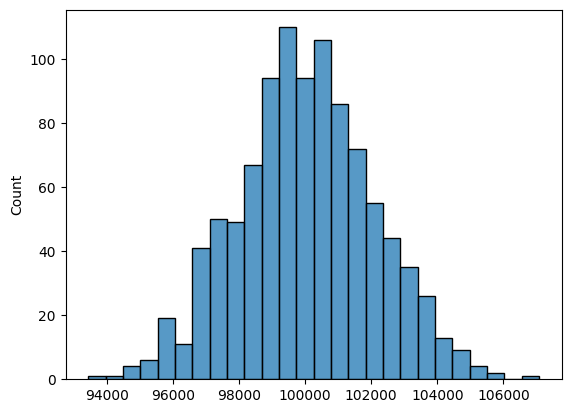

In [6]:
# Model impressions as a Poisson random variable with a mean value lam.

# When you generate impr_distr using np.random.poisson(lam_distr, sims), you are creating a single distribution of Poisson-distributed values based on the array of means (lam_distr). Each value in lam_distr serves as the mean for a Poisson distribution, and np.random.poisson generates a Poisson-distributed value for each of these means.

impr_distr = np.random.poisson(lam_distr, sims)

sns.histplot(impr_distr)
impr_distr[:10]

C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


array([1048,  973, 1027,  981,  959, 1016,  995,  988,  947,  984])

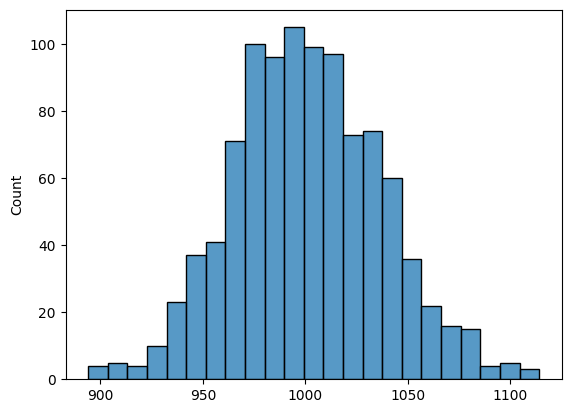

In [7]:
# Model clicks and signups as binomial random variables with n as impressions and clicks and p as ct_rate[cost] and su_rate[cost], respectively.

cost = 'low' # or 'high'

clicks_distr = np.random.binomial(n=impr_distr, p=ct_rate[cost])

sns.histplot(clicks_distr)
clicks_distr[:10]

C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


array([203, 200, 232, 199, 210, 213, 223, 201, 213, 210])

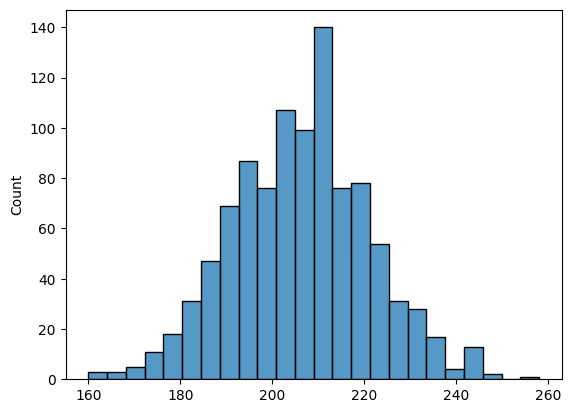

In [8]:
cost = 'high' # or 'low'

sign_distr = np.random.binomial(n=clicks_distr, p=su_rate[cost])

sns.histplot(sign_distr)
sign_distr[:10]

In [9]:
def get_signups(cost, ct_rate, su_rate, sims): 
    
    lam = np.random.normal(loc=100000, scale=2000, size=sims)
    impressions = np.random.poisson(lam, sims)
    clicks = np.random.binomial(n=impressions, p=ct_rate[cost])
    signups = np.random.binomial(n=clicks, p=su_rate[cost])
    
    return signups

Purchase Flow

After signups, let's model the revenue generation process. Once the customer has signed up, they decide whether or not to purchase - a natural candidate for a binomial RV. Let's assume that 10% of signups result in a purchase.

Although customers can make many purchases, let's assume one purchase. The purchase value could be modeled by any continuous RV, but one nice candidate is the exponential RV. Suppose we know that purchase value per customer has averaged around $1000. We use this information to create the purchase_values RV. The revenue, then, is simply the sum of all purchase values.

C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


array([20, 25, 24, 20, 22, 21, 20, 24, 13, 16])

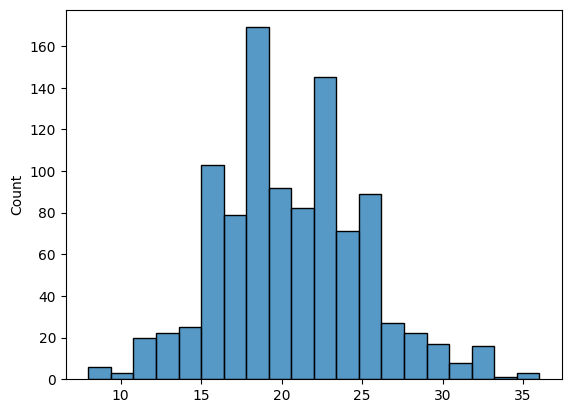

In [11]:
purch_distr = np.random.binomial(n=sign_distr, p=0.1)

sns.histplot(purch_distr)
purch_distr[:10]

C:\Users\Alienware\miniconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


array([ 571.89063472, 1462.32017425,   74.903615  , 1956.16449711,
       1664.06622965,  332.42299227,  487.80665319,  483.61157883,
         10.28654362, 1419.00890369,  540.82893166,  248.47586527,
        611.78415273, 2113.36844374, 2074.15662854, 2281.79424013,
        280.02253852, 2408.44870843, 1009.28045124,  972.05609246])

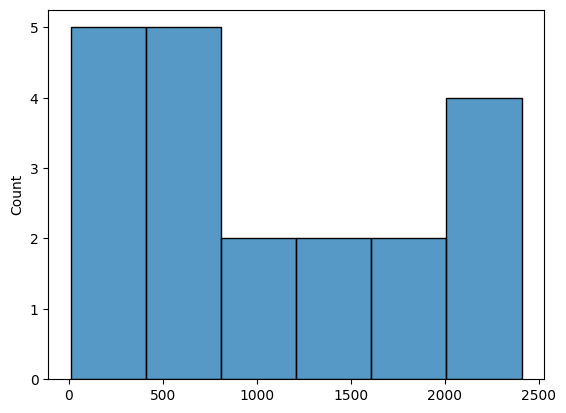

In [12]:
values_distr = np.random.exponential(scale=1000, size=purch_distr[0]) 

sns.histplot(values_distr)
values_distr

In [22]:
signups_low_3sim = get_signups('low', ct_rate, su_rate, 3)
signups_low_3sim

array([212, 211, 206])

In [23]:
def get_revenue(signups):
    rev = []
    # np.random.seed(123)
    for s in signups:
        # Model purchases as binomial, purchase_values as exponential
        purchases = np.random.binomial(n=s, p=0.1)
        purchase_values = np.random.exponential(scale=1000, size=purchases)
        
#         # Append to revenue the sum of all purchase values.
        rev.append(purchase_values.sum()) 
    return rev

get_revenue(signups_low_3sim)

[14577.857717764953, 26795.899650724154, 21244.261382401888]

Probability of losing money
In this exercise, we will use the DGP model to estimate probability.

As seen earlier, this company has the option of spending extra money, let's say 3000, to redesign the ad. This could potentially get them higher clickthrough and signup rates, but this is not guaranteed. We would like to know whether or not to spend this extra 3000 by calculating the probability of losing money. In other words, the probability that the revenue from the high-cost option minus the revenue from the low-cost option is lesser than the cost.

Once we have simulated revenue outcomes, we can ask a rich set of questions that might not have been accessible using traditional analytical methods.

This simple yet powerful framework forms the basis of Bayesian methods for getting probabilities.


In [14]:
# Initialize cost_diff
sims, cost_diff = 10000, 3000

In [15]:
# Get revenue when the cost is 'low' and when the cost is 'high'
rev_low = get_revenue(get_signups('low', ct_rate, su_rate, sims))
rev_high = get_revenue(get_signups('high', ct_rate, su_rate, sims))

len(rev_low), len(rev_high), rev_low[:10], rev_high[:10]

(10000,
 10000,
 [16407.619007148314,
  14120.757583768798,
  22882.597598252716,
  8289.278901205358,
  17407.960522974612,
  14764.05450461572,
  29165.999952119157,
  20725.71676812241,
  42819.757663359596,
  15775.337762634108],
 [22500.27971067652,
  15037.48243542718,
  28341.916120375266,
  17496.738597255386,
  20153.95187562726,
  29089.26033260685,
  33412.46733077526,
  17893.07234010897,
  32211.670128232756,
  28396.801456413938])

In [16]:
# calculate fraction of times rev_high - rev_low is less than cost_diff
frac = np.mean([(rev_high[i]-rev_low[i]) < cost_diff for i in range(len(rev_high))])
print("Probability of losing money = {}".format(frac))

Probability of losing money = 0.4415
